## Taiyō - Machine Learning Assignment
### Natural Language Understanding

Using the status variable build a binary classifier to predict the probability whether a project will be “closed” or “canceled/distressed”<br>
Dataset used: [World Bank Projects](https://projects.worldbank.org/en/projects-operations/projects-home)<br>

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Load the dataset
d=pd.read_excel("World_Bank_Projects_downloaded_6_14_2022.xls",header=1)
d

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
1,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
2,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
3,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
4,P179254,Western and Central Africa,Republic of Cameroon,Pipeline,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,NaN,http://projects.worldbank.org/P179254/null?lan...,...,0,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21539,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21540,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21541,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21542,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [3]:
#Clean the dataset
df=d.iloc[1:]
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

In [4]:
#Remove the column Project ID
df.drop('Project ID',axis=1,inplace=True)

In [5]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Region                             21541 non-null  object
 1   Country                            21541 non-null  object
 2   Project Status                     21539 non-null  object
 3   Last Stage Reached Name            15196 non-null  object
 4   Project Name                       21542 non-null  object
 5   Project Development Objective      11580 non-null  object
 6   Implementing Agency                6649 non-null   object
 7   Consultant Services Required       1484 non-null   object
 8   Project URL                        21542 non-null  object
 9   Board Approval Date                18786 non-null  object
 10  Project Closing Date               16584 non-null  object
 11  Financing Type                     13037 non-null  object
 12  Curr

In [6]:
#Display summary
df.describe()

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
count,21541,21541,21539,15196,21542,11580,6649,1484,21542,18786,...,21542,6412,21294,13082,1275,19627,11176,7565,12255,9895
unique,11,207,4,5,18606,9862,4621,3,21542,5985,...,969,2187,18,8,4,160,102,91,73,72
top,Latin America and Caribbean,Republic of India,Closed,Bank Approved,Education Project (02),Project Development Objective (Note: will be d...,Ministry of Finance,Y,http://projects.worldbank.org/P097136/open-afr...,2020-04-02T00:00:00Z,...,0,Ministry of Finance,Specific Investment Loan,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
freq,3766,918,15783,13494,70,47,227,911,1,28,...,17627,653,8021,5862,543,1813,1632,763,867,734


In [7]:
#Check for missing/null values
df.isnull().sum()

Region                                   2
Country                                  2
Project Status                           4
Last Stage Reached Name               6347
Project Name                             1
Project Development Objective         9963
Implementing Agency                  14894
Consultant Services Required         20059
Project URL                              1
Board Approval Date                   2757
Project Closing Date                  4959
Financing Type                        8506
Current Project Cost                   148
IBRD Commitment                          1
IDA Commitment                           1
Total IDA and IBRD Commitment            1
Grant Amount                             1
Borrower                             15131
Lending Instrument                     249
Environmental Assessment Category     8461
Environmental and Social Risk        20268
Sector 1                              1916
Sector 2                             10367
Sector 3   

In [8]:
#Removing rows with NA values
df=df.dropna(subset=['Region','Country','Project Status','Project Name','Current Project Cost','Lending Instrument'])

In [9]:
#Removing rows with Project Status=Pipeline 
df=df[df['Project Status']!='Pipeline']

In [10]:
#Display unique Project Status labels
df['Project Status'].unique()

array(['Active', 'Dropped', 'Closed'], dtype=object)

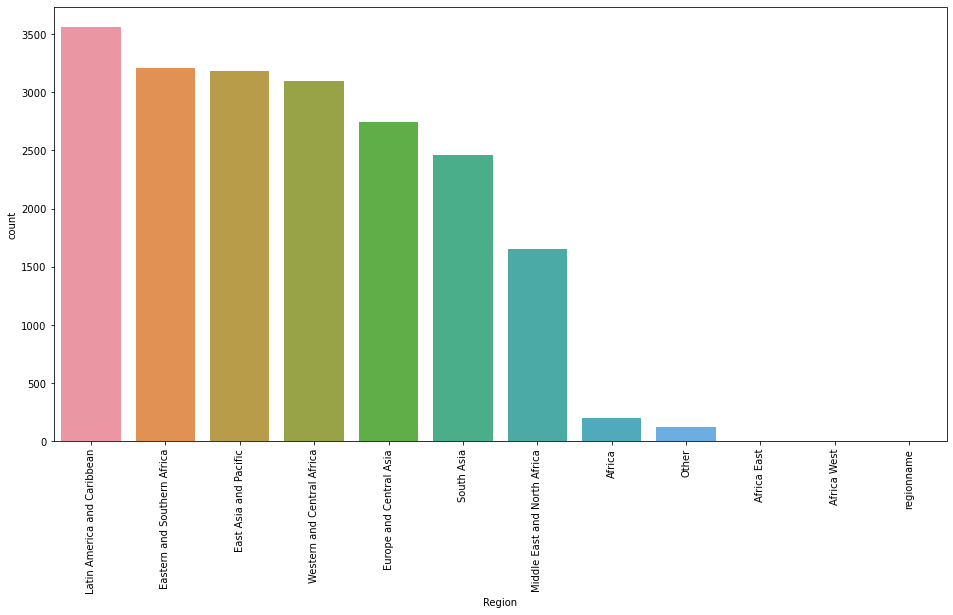

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(x='Region',data=df,order=d['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Inference: Most of the projects have been implemented in Latin America and Caribbean region.

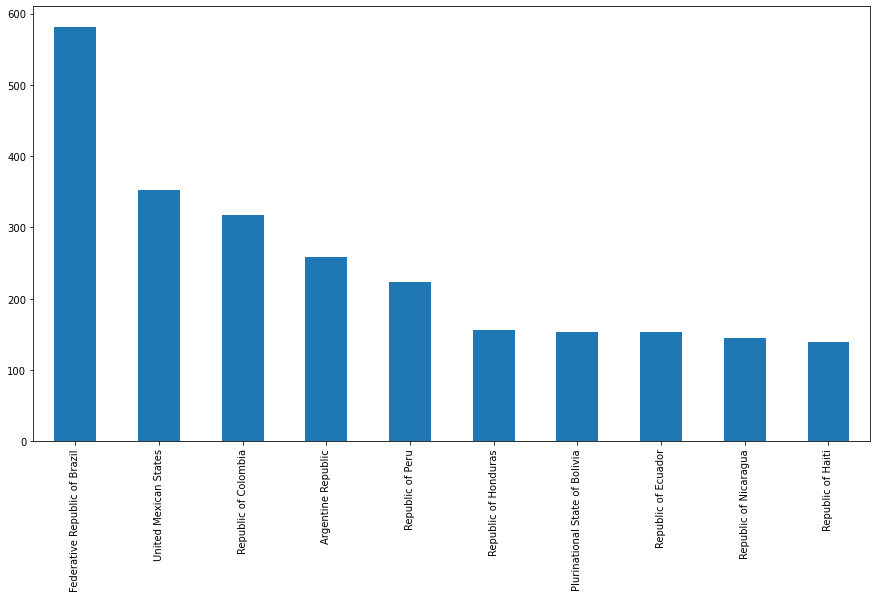

In [12]:
region=d.groupby('Region')
lac=region.get_group('Latin America and Caribbean')
lac['Country'].value_counts().nlargest(10).plot(kind='bar',figsize=(15,8))
plt.show()

Inference: Here the top ten countries of Latin America and Caribbean region with the most number of projects are displayed.

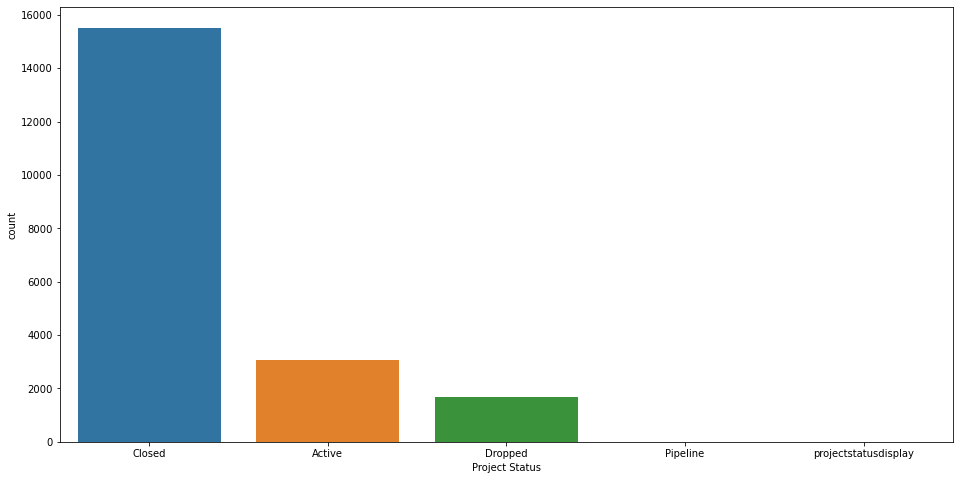

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x='Project Status',data=df,order=d['Project Status'].value_counts().index)
plt.show()

Inference: Most of the projects have their status as Closed. Few projects are Active and even fewer projects have been Dropped.

In [14]:
#Storing data with Project Status=Active
activedata=df[df['Project Status']=='Active']
activedata

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
70,Western and Central Africa,Republic of The Gambia,Active,Bank Approved,Third AF to The Gambia COVID-19 Vaccine Prepar...,"To prevent, detect and respond to the threat p...",Ministry of Health,NaN,http://projects.worldbank.org/P178965/null?lan...,2022-06-06T00:00:00Z,...,0,The Gambia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Europe and Central Asia,Ukraine,Active,Bank Approved,Public Expenditures for Administrative Capacit...,To contribute to sustaining the government adm...,Ministry of Finance,TBD,http://projects.worldbank.org/P178946/null?lan...,2022-06-07T00:00:00Z,...,0,Ukraine,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN
89,Eastern and Southern Africa,Somali Democratic Republic,Active,Bank Approved,Somalia Urban Resilience Project Phase II Addi...,To strengthen public service delivery capacity...,"Garowe Municipality/ Puntland, Baidoa Municipa...",Y,http://projects.worldbank.org/P178887/null?lan...,2022-06-03T00:00:00Z,...,0,Federal Republic of Somalia,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,Europe and Central Asia,Republic of Kazakhstan,Active,Bank Approved,Second Irrigation and Drainage Improvement Pro...,The Project development objective is to improv...,"Ministry of Ecology, Geology and Natural Resou...",NaN,http://projects.worldbank.org/P086592/second-i...,2013-06-27T00:00:00Z,...,0,Ministry of Finance,Investment Project Financing,B,NaN,"Agricultural Extension, Research, and Other Su...",Irrigation and Drainage,"Other Agriculture, Fishing and Forestry",Other rural development,Water resource management
10500,East Asia and Pacific,Republic of Indonesia,Active,Bank Approved,Third Water Supply and Sanitation for Low-Inco...,To increase the number of under-served rural a...,"Ministry of Public Works and Housing, DG Commu...",NaN,http://projects.worldbank.org/P085375/third-wa...,2006-06-27T00:00:00Z,...,0,Republic of Indonesia,Investment Project Financing,B,NaN,Water Supply,Sanitation,Social Protection,Participation and civic engagement,Rural services and infrastructure
10502,Other,World,Active,Bank Approved,ILO Labour Market Indicators Library,NaN,NaN,NaN,http://projects.worldbank.org/P085350/ilo-labo...,2004-09-15T00:00:00Z,...,350000,NaN,Investment Project Financing,C,NaN,Social Protection,NaN,NaN,"Economic statistics, modeling and forecasting",NaN
11272,Eastern and Southern Africa,Eastern and Southern Africa,Active,Bank Approved,AFR RI-Regional Rusumo Falls Hydroelectric Pro...,The development objective of the Regional Rusu...,"NBI NELSAP Coordination Unit (NELSAP-CU), Rusu...",NaN,http://projects.worldbank.org/P075941/nelsap-r...,2013-08

In [15]:
#Storing data with Project Status!=Active
closedropdata=df[df['Project Status']!='Active']
closedropdata

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
194,South Asia,Republic of India,Dropped,Concept Review,Strengthening Teaching-Learning and Results fo...,The Project Development Objective (PDO) of the...,NaN,NaN,http://projects.worldbank.org/P178571/null?lan...,NaN,...,0,NaN,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,Europe and Central Asia,Romania,Dropped,Concept Review,Emergency Response and Preparedness Program-fo...,To strengthen the capacity of Romanian institu...,"Ministry of Health, Department for Emergency S...",NaN,http://projects.worldbank.org/P178288/null?lan...,NaN,...,0,Ministry of Finance,Program-for-Results Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,Europe and Central Asia,Ukraine,Dropped,Concept Review,Sustainable Energy Efficiency in Municipal Ser...,The development objective is to increase energ...,Ukrexim Bank,NaN,http://projects.worldbank.org/P177493/null?lan...,NaN,...,0,Ukrexim Bank,Investment Project Financing,NaN,Moderate,NaN,NaN,NaN,NaN,NaN
657,Latin America and Caribbean,United Mexican States,Dropped,Concept Review,Mexico: Sustainable Urban Development,To improve living conditions of vulnerable hou...,"Secretariat for Agrarian, Territorial and Urba...",NaN,http://projects.worldbank.org/P176771/null?lan...,NaN,...,0,United Mexican States,Investment Project Financing,NaN,Substantial,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21538,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,NaN,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21539,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,1992-05-19T00:00:00Z,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21540,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,1990-02-01T00:00:00Z,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21541,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,1997-12-18T00:00:00Z,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [16]:
#Active projects with relevant features
ft_active=activedata[['Region','Project Status','Current Project Cost','IBRD Commitment ','IDA Commitment','Total IDA and IBRD Commitment','Grant Amount']]
ft_active.head()

,Region,Project Status,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
0,Eastern and Southern Africa,Active,120000000,0,120000000,120000000,0
1,East Asia and Pacific,Active,39140000,0,35200000,35200000,0
70,Western and Central Africa,Active,12000000,0,12000000,12000000,0
73,Europe and Central Asia,Active,2042000000,492000000,1000000000,1492000000,0
89,Eastern and Southern Africa,Active,41500000,0,20000000,20000000,0


In [17]:
#Closed or Dropped projects with relevant features
ft_closedrop=closedropdata[['Region','Project Status','Current Project Cost','IBRD Commitment ','IDA Commitment','Total IDA and IBRD Commitment','Grant Amount']]
ft_closedrop.head()

,Region,Project Status,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount
2,Eastern and Southern Africa,Dropped,340000,0,0,0,340000
194,South Asia,Dropped,1000000000,1000000000,0,1000000000,0
258,Europe and Central Asia,Dropped,1448650000,288650000,0,288650000,0
473,Europe and Central Asia,Dropped,341640000,300000000,0,300000000,0
657,Latin America and Caribbean,Dropped,150000000,150000000,0,150000000,0


In [18]:
print(ft_active['Project Status'].unique())
print(ft_active['Region'].unique())

['Active']
['Eastern and Southern Africa' 'East Asia and Pacific'
 'Western and Central Africa' 'Europe and Central Asia'
 'Middle East and North Africa' 'South Asia' 'Latin America and Caribbean'
 'Africa' 'Other' 'Africa East']


In [19]:
print(ft_closedrop['Project Status'].unique())
print(ft_closedrop['Region'].unique())

['Dropped' 'Closed']
['Eastern and Southern Africa' 'South Asia' 'Europe and Central Asia'
 'Latin America and Caribbean' 'East Asia and Pacific'
 'Middle East and North Africa' 'Other' 'Western and Central Africa'
 'Africa']


In [20]:
Classes={'Dropped':0,'Closed':1}
ft_closedrop=ft_closedrop.replace({'Project Status':Classes})

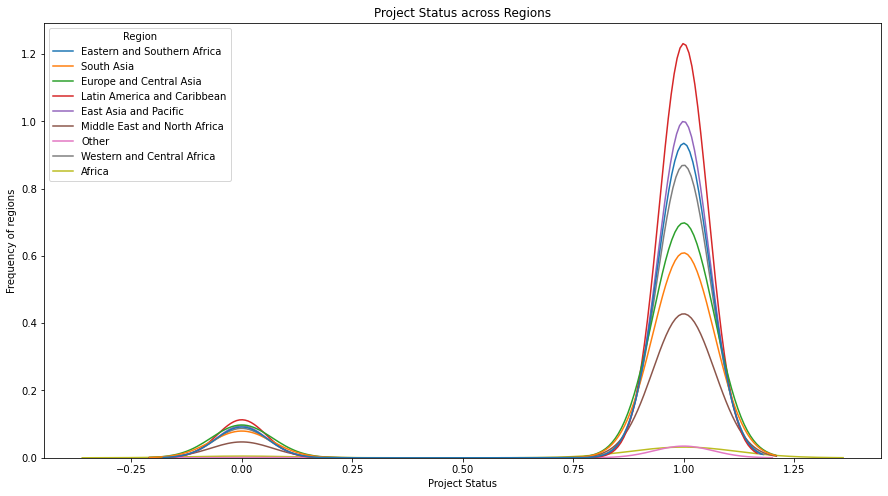

In [21]:
plt.figure(figsize=(15,8))
plt.title('Project Status across Regions')
sns.kdeplot(ft_closedrop['Project Status'],hue=ft_closedrop['Region'])
plt.xlabel('Project Status')
plt.ylabel('Frequency of regions')
plt.show()

In [22]:
#Replacing categorical Region with dummy variables in Active projects
regions = pd.get_dummies(ft_active['Region'])
ft_active = ft_active.join(regions).drop('Region',axis=1)

In [23]:
#Replacing categorical Region with dummy variables in Closed/Dropped projects
regions = pd.get_dummies(ft_closedrop['Region'])
ft_closedrop = ft_closedrop.join(regions).drop('Region',axis=1)

In [24]:
ft_closedrop.tail()

,Project Status,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Africa,East Asia and Pacific,Eastern and Southern Africa,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,Other,South Asia,Western and Central Africa
21538,0,10000000,0,10000000,10000000,0,1,0,0,0,0,0,0,0,0
21539,1,6100000,0,5500000,5500000,0,1,0,0,0,0,0,0,0,0
21540,1,55000000,15000000,40000000,55000000,0,1,0,0,0,0,0,0,0,0
21541,1,19700000,0,0,0,4100000,1,0,0,0,0,0,0,0,0
21542,1,7000000,0,0,0,4400000,1,0,0,0,0,0,0,0,0


Splitting the Data into Training Data and Test Data

In [25]:
X=ft_closedrop.drop(columns=['Project Status'],axis=1)
Y=ft_closedrop['Project Status']

In [26]:
print(X)

      Current Project Cost IBRD Commitment  IDA Commitment  \
2                   340000                0              0   
194             1000000000       1000000000              0   
258             1448650000        288650000              0   
473              341640000        300000000              0   
657              150000000        150000000              0   
...                    ...              ...            ...   
21538             10000000                0       10000000   
21539              6100000                0        5500000   
21540             55000000         15000000       40000000   
21541             19700000                0              0   
21542              7000000                0              0   

      Total IDA and IBRD Commitment Grant Amount  Africa  \
2                                 0       340000       0   
194                      1000000000            0       0   
258                       288650000            0       0   
473            

In [27]:
print(Y)

2        0
194      0
258      0
473      0
657      0
        ..
21538    0
21539    1
21540    1
21541    1
21542    1
Name: Project Status, Length: 17185, dtype: int64


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(17185, 14) (13748, 14) (3437, 14)


### Model Training

Using the Logistic Regression model

In [29]:
model_lr=LogisticRegression(max_iter=1000)

#Training Logistic Regression model with training data
model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Printing logistic regression model accuracy on training data

In [30]:
#Accuracy on training data
X_train_prediction_lr=model_lr.predict(X_train)
training_data_accuracy_lr=accuracy_score(X_train_prediction_lr,Y_train)

In [31]:
print('Logistic Regression - Accuracy on Training data : ',training_data_accuracy_lr)

Logistic Regression - Accuracy on Training data :  0.9007855688100087


In [32]:
#Accuracy on test data
X_test_prediction_lr=model_lr.predict(X_test)
test_data_accuracy_lr=accuracy_score(X_test_prediction_lr,Y_test)

In [33]:
print('Logistic Regression - Accuracy on Test data : ',test_data_accuracy_lr)

Logistic Regression - Accuracy on Test data :  0.8981670061099797



Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.26      0.04        27
           1       0.99      0.90      0.95      3410

    accuracy                           0.90      3437
   macro avg       0.51      0.58      0.49      3437
weighted avg       0.99      0.90      0.94      3437


Confusion Matrix:


<AxesSubplot:>

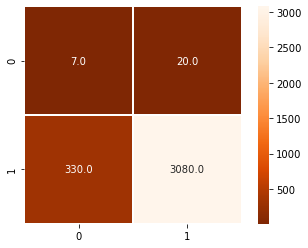

In [34]:
print('\nClassification Report:')
print(classification_report(X_test_prediction_lr,Y_test))
print('\nConfusion Matrix:')
sns.heatmap(metrics.confusion_matrix(X_test_prediction_lr,Y_test),annot=True,fmt=".1f",linewidths=.90,square=True,cmap='Oranges_r')

In [35]:
test_score=test_data_accuracy_lr*100
train_score=training_data_accuracy_lr*100
results_df=pd.DataFrame(data=[["Logistic Regression",train_score, test_score]],columns=['Model','Training Accuracy %','Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.078557,89.816701


Using the Random Forest model

In [36]:
#RF model with 1000 trees
model_rf=RandomForestClassifier(random_state=0,n_estimators=1000)

#Train the RF model
model_rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [37]:
#RF accuracy on training data
X_train_prediction_rf=model_rf.predict(X_train)
training_data_accuracy_rf=accuracy_score(X_train_prediction_rf,Y_train)

Print accuracy of RF model on training data

In [38]:
print('Random Forest - Accuracy on Training data : ',training_data_accuracy_rf)

Random Forest - Accuracy on Training data :  0.9522839685772476


Now train using the test data

In [39]:
#RF accuracy on test data
X_test_prediction_rf=model_rf.predict(X_test)
test_data_accuracy_rf=accuracy_score(X_test_prediction_rf,Y_test)

In [40]:
print('Random Forest - Accuracy on Test data : ',test_data_accuracy_rf)

Random Forest - Accuracy on Test data :  0.8824556299098051



Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.21      0.11       115
           1       0.97      0.91      0.94      3322

    accuracy                           0.88      3437
   macro avg       0.52      0.56      0.52      3437
weighted avg       0.94      0.88      0.91      3437


Confusion Matrix:


<AxesSubplot:>

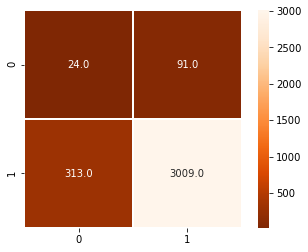

In [41]:
print('\nClassification Report:')
print(classification_report(X_test_prediction_rf,Y_test))
print('\nConfusion Matrix:')
sns.heatmap(metrics.confusion_matrix(X_test_prediction_rf,Y_test),annot=True,fmt=".1f",linewidths=.90,square=True,cmap='Oranges_r')

In [42]:
test_score=test_data_accuracy_rf*100
train_score=training_data_accuracy_rf*100
results_df_2=pd.DataFrame(data=[["Random Forest Classifier",train_score, test_score]],columns=['Model','Training Accuracy %','Testing Accuracy %'])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.078557,89.816701
1,Random Forest Classifier,95.228397,88.245563


Using the Naive Bayes model

In [43]:
model_nb= GaussianNB()

#Train the NB model
model_nb.fit(X_train,Y_train)

GaussianNB()

In [44]:
#NB accuracy on training data
X_train_prediction_nb=model_nb.predict(X_train)
training_data_accuracy_nb=accuracy_score(X_train_prediction_nb,Y_train)

Print accuracy of RF model on training data

In [45]:
print('Naive Bayes - Accuracy on Training data : ',training_data_accuracy_nb)

Naive Bayes - Accuracy on Training data :  0.8970032004655223


Now train using the test data

In [46]:
#NB accuracy on test data
X_test_prediction_nb=model_nb.predict(X_test)
test_data_accuracy_nb=accuracy_score(X_test_prediction_nb,Y_test)

In [47]:
print('Naive Bayes - Accuracy on Test data : ',test_data_accuracy_nb)

Naive Bayes - Accuracy on Test data :  0.8981670061099797



Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.26      0.04        27
           1       0.99      0.90      0.95      3410

    accuracy                           0.90      3437
   macro avg       0.51      0.58      0.49      3437
weighted avg       0.99      0.90      0.94      3437


Confusion Matrix:


<AxesSubplot:>

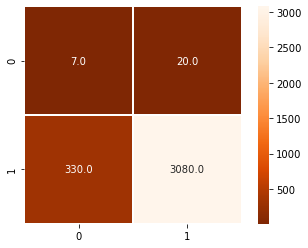

In [48]:
print('\nClassification Report:')
print(classification_report(X_test_prediction_nb,Y_test))
print('\nConfusion Matrix:')
sns.heatmap(metrics.confusion_matrix(X_test_prediction_nb,Y_test),annot=True,fmt=".1f",linewidths=.90,square=True,cmap='Oranges_r')

In [49]:
test_score=test_data_accuracy_nb*100
train_score=training_data_accuracy_nb*100
results_df_2=pd.DataFrame(data=[["Naive Bayes Classifier",train_score, test_score]],columns=['Model','Training Accuracy %','Testing Accuracy %'])
results_df=results_df.append(results_df_2,ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,90.078557,89.816701
1,Random Forest Classifier,95.228397,88.245563
2,Naive Bayes Classifier,89.700320,89.816701


In [50]:
models_test_acc = [test_data_accuracy_lr, test_data_accuracy_rf,test_data_accuracy_nb]
accuracy_scores = []
for model in models_test_acc:
  accuracy_scores.append(model)
print(accuracy_scores)

[0.8981670061099797, 0.8824556299098051, 0.8981670061099797]


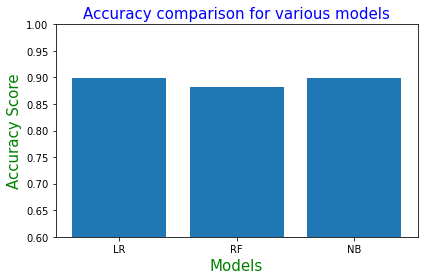

In [51]:
plt.bar(['LR','RF','NB'],accuracy_scores)
plt.ylim(0.6,1.0)
plt.title('Accuracy comparison for various models',fontsize =15, color='b')
plt.xlabel('Models',fontsize =15,color='g')
plt.ylabel('Accuracy Score',fontsize =15,color='g')
plt.tight_layout()
plt.show()

Inference: From the barplot, it is clear that LR and NB shows highest accuracy score, and RF shows least accuracy score.

Predictions based on Logistic Regression model

In [52]:
input_data=(10000000,0,10000000,10000000,0,1,0,0,0,0,0,0,0,0)

#Change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction_lr=model_lr.predict(input_data_reshaped)
print(prediction_lr)

if(prediction_lr[0]==0):
    print('\nUsing Logistic Reg model - Project Status is Canceled/Distressed\n')
else:
    print('\nUsing Logistic Reg model - Project Status is Closed\n')

[1]

Using Logistic Reg model - Project Status is Closed

